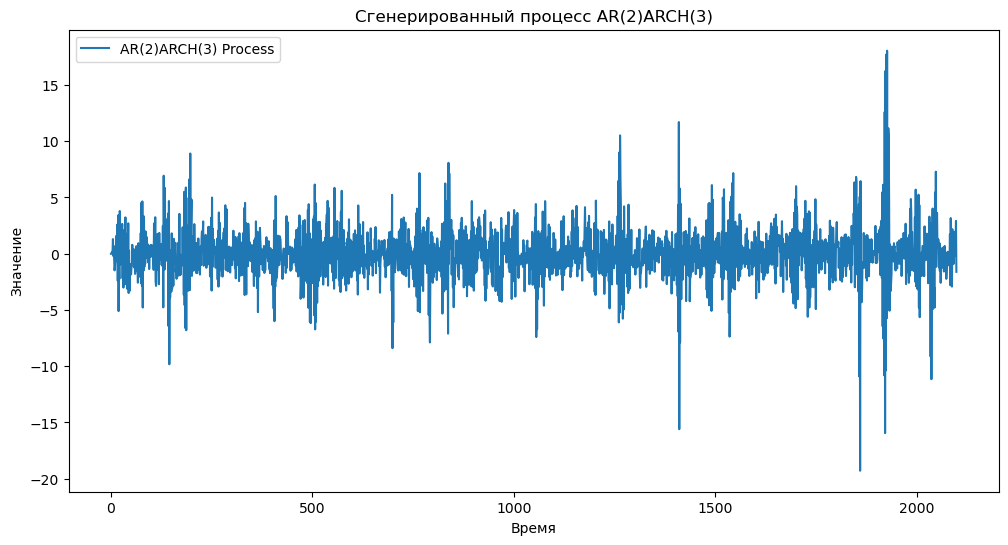

In [145]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры модели
theta = [-0.3, 0.4]  
a = [1.0, 0.2, 0.1, 0.2] 
n = 2100  # Количество наблюдений

# Инициализация массивов
x = np.zeros(n)
sigma = np.zeros(n)

def ArArch(n):
    x = np.zeros(n)
    sigma = np.zeros(n)
    for t in range(3, n):
        sigma[t] = a[0] + a[1] * x[t-1]**2 + a[2] * x[t-2]**2 + a[3] * x[t-3]**2
        x[t] = theta[0] * x[t-1] + theta[1] * x[t-2] + np.random.normal(0, 1) * np.sqrt(sigma[t])
    vector = [x, sigma]
    return vector
# Генерация процесса

#np.random.seed(42)  # Для воспроизводимости
result = ArArch(n)


# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(result[0], label="AR(2)ARCH(3) Process")
plt.title("Сгенерированный процесс AR(2)ARCH(3)")
plt.xlabel("Время")
plt.ylabel("Значение")
plt.legend()
plt.show()


In [147]:
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model

train_size = 2000
x = result[0]
train, test = x[:train_size], x[train_size:]

# Оценка параметров AR(2)
model_ar = ARIMA(train, order=(2, 0, 0))
result_ar = model_ar.fit()
theta_hat = result_ar.params[:3][1:]
print("Оценка параметров AR(2) theta:", theta_hat)

# Оценка параметров ARCH(3)
residuals = result_ar.resid
model_arch = arch_model(residuals, vol="ARCH", p=3)
result_arch = model_arch.fit()
a_hat = result_arch.params
print("Оценка параметров A:", a_hat)

Оценка параметров AR(2) theta: [-0.25935517  0.42837977]
Iteration:      1,   Func. Count:      7,   Neg. LLF: 9287.138960057233
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4706.8997748447255
Iteration:      3,   Func. Count:     23,   Neg. LLF: 3995.092029420648
Iteration:      4,   Func. Count:     30,   Neg. LLF: 4117.383931385121
Iteration:      5,   Func. Count:     38,   Neg. LLF: 4156.355536783992
Iteration:      6,   Func. Count:     46,   Neg. LLF: 7775.59912519444
Iteration:      7,   Func. Count:     54,   Neg. LLF: 3885.8966422834883
Iteration:      8,   Func. Count:     61,   Neg. LLF: 3885.69923402033
Iteration:      9,   Func. Count:     67,   Neg. LLF: 3885.6992329466857
Iteration:     10,   Func. Count:     72,   Neg. LLF: 3885.699232946696
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3885.6992329466857
            Iterations: 10
            Function evaluations: 72
            Gradient evaluations: 10
Оценка парам

C:\Users\i7new\AppData\Local\Temp\ipykernel_44704\511428623.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma[t] += a_hat[k+1] * (x_train[-k]**2 if t < k else x_test[t-k]**2 ) # берет значения из тренировочной на старте если не хватает
C:\Users\i7new\AppData\Local\Temp\ipykernel_44704\511428623.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma[t] += a_hat[1]


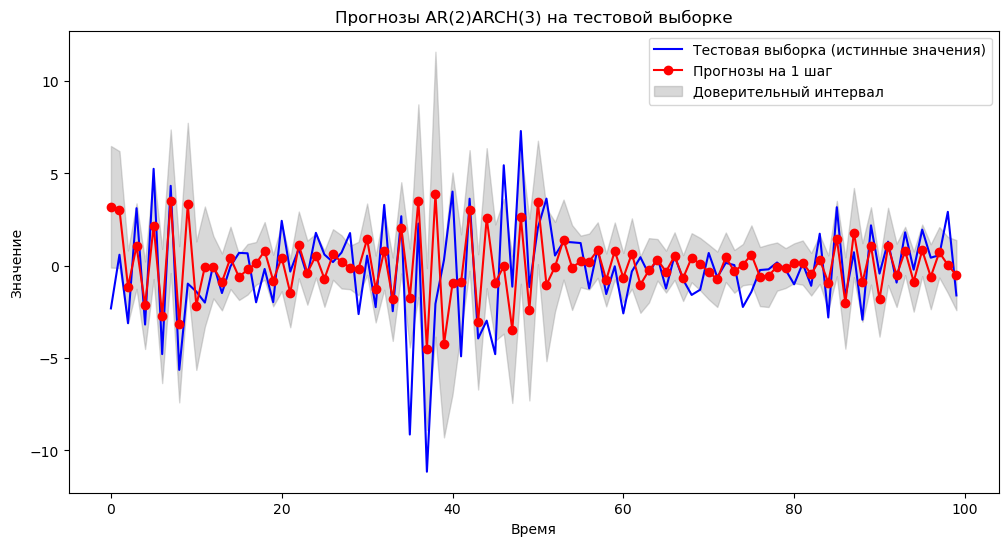

In [149]:
#Генерация прогнозов
def ArArch(x_test, n ,x_train, a_hat, theta_hat):
    x_pred = np.zeros(n)
    sigma = np.zeros(n)
    for t in range(n):
        for k in range(1,4):
            sigma[t] += a_hat[k+1] * (x_train[-k]**2 if t < k else x_test[t-k]**2 ) # берет значения из тренировочной на старте если не хватает
        sigma[t] += a_hat[1]
        for k in range(1,3):
            x_pred[t] += theta_hat[k-1] * (x_train[-k] if t < k else x_test[t-k])
    vector = [x_pred, np.sqrt(sigma)]
    return vector

vector_res = ArArch(test, len(test),train, a_hat, theta_hat)
x_pred = vector_res[0]
volatility_bounds = vector_res[1]

#Построение графика прогнозов 
plt.figure(figsize=(12, 6)) 
plt.plot(range(len(test)), test, label="Тестовая выборка (истинные значения)", color="blue") 
plt.plot(range(len(test)), x_pred, label="Прогнозы на 1 шаг", marker="o", color="red") 
plt.fill_between( 
    range(len(test)), 
    x_pred - volatility_bounds,
    x_pred + volatility_bounds, 
    color="gray", 
    alpha=0.3, 
    label="Доверительный интервал" 
) 

plt.legend() 
plt.title("Прогнозы AR(2)ARCH(3) на тестовой выборке") 
plt.xlabel("Время") 
plt.ylabel("Значение") 
plt.show()

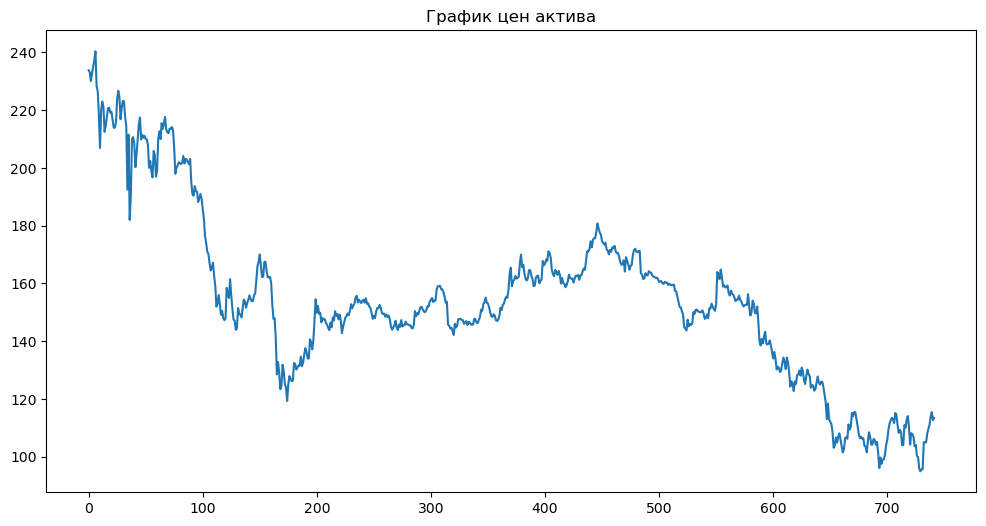

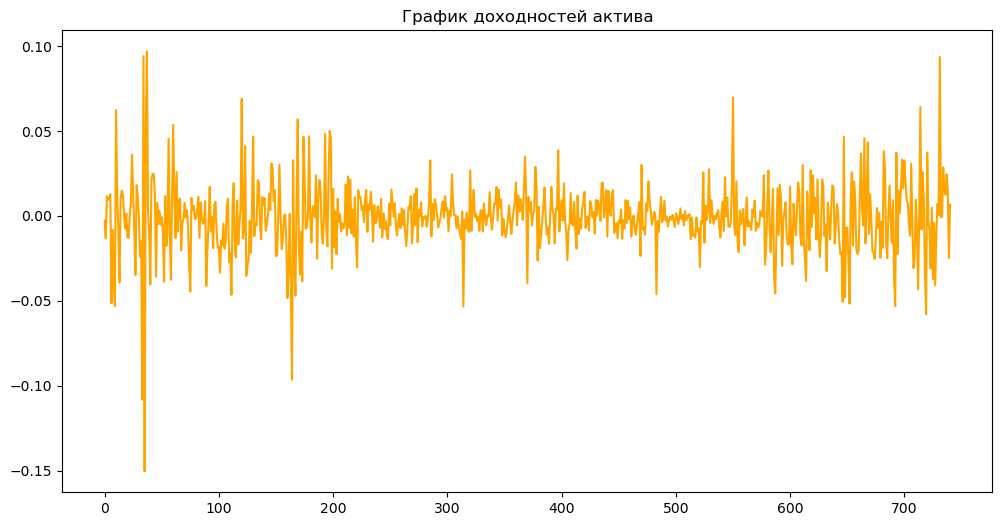

Оценка параметров AR(2) theta: [-0.06833453 -0.0616015 ]
Iteration:      1,   Func. Count:      7,   Neg. LLF: 1478545202.134687
Iteration:      2,   Func. Count:     21,   Neg. LLF: 77802.22366962218
Iteration:      3,   Func. Count:     28,   Neg. LLF: 4095139764.321201
Iteration:      4,   Func. Count:     41,   Neg. LLF: -1215.7533805360595
Iteration:      5,   Func. Count:     50,   Neg. LLF: -1651.4275063768803
Iteration:      6,   Func. Count:     57,   Neg. LLF: -1189.7579185828868
Iteration:      7,   Func. Count:     65,   Neg. LLF: -1794.3128542646234
Iteration:      8,   Func. Count:     72,   Neg. LLF: -1831.279882403211
Iteration:      9,   Func. Count:     79,   Neg. LLF: -1853.2208610810949
Iteration:     10,   Func. Count:     86,   Neg. LLF: -1853.9238797491837
Iteration:     11,   Func. Count:     94,   Neg. LLF: -1862.5401572114056
Iteration:     12,   Func. Count:    100,   Neg. LLF: -1862.5887408494373
Iteration:     13,   Func. Count:    106,   Neg. LLF: -1862.58

F:\Programm\AcronPy\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003818. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\i7new\AppData\Local\Temp\ipykernel_44704\511428623.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma[t] += a_hat[k+1] * (x_train[-k]**2 if t < k else x_test[t-k]**2 ) # берет значения из тренировочной на старте если не хватает
C:\Users\i7new\AppData\Local\Temp\ipykernel_44704\511428623.py:8: FutureWarning: Series.__getitem__ treating ke

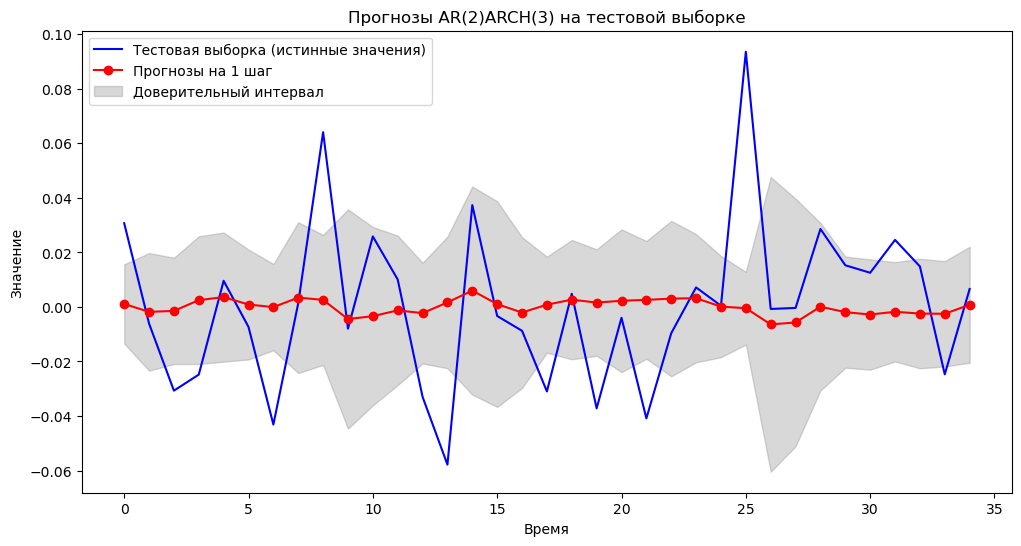

In [163]:
import pandas as pd

data = pd.read_csv("DATA_LAB3.csv", delimiter=";") # акции НорНикель

prices = data["<CLOSE>"]

z = np.diff(np.log(prices)) # Логарифмическая доходность

plt.figure(figsize=(12, 6))
plt.plot(prices, label="Цены актива")
plt.title("График цен актива")
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(z, label="Доходности актива", color="orange")
plt.title("График доходностей актива")
plt.show()

train_size = round(len(z)*20/21)
train, test = z[:train_size], z[train_size:]

# Оценка параметров AR(2)
model_ar = ARIMA(train, order=(2, 0, 0))
result_ar = model_ar.fit()
theta_hat = result_ar.params[:3][1:]
print("Оценка параметров AR(2) theta:", theta_hat)

# Оценка параметров ARCH(3)
residuals = result_ar.resid
model_arch = arch_model(residuals, vol="ARCH", p=3)
result_arch = model_arch.fit()
a_hat = result_arch.params
print("Оценка параметров A:", a_hat)
 
# Построение прогноза 
vector_res = ArArch(test, len(test) ,train, a_hat, theta_hat)
x_pred = vector_res[0]
volatility_bounds = vector_res[1]

#Построение графика прогнозов 
plt.figure(figsize=(12, 6)) 
plt.plot(range(len(test)), test, label="Тестовая выборка (истинные значения)", color="blue") 
plt.plot(range(len(test)), x_pred, label="Прогнозы на 1 шаг", marker="o", color="red") 
plt.fill_between( 
    range(len(test)), 
    x_pred -  volatility_bounds,
    x_pred +  volatility_bounds, 
    color="gray", 
    alpha=0.3, 
    label="Доверительный интервал" 
) 

plt.legend() 
plt.title("Прогнозы AR(2)ARCH(3) на тестовой выборке") 
plt.xlabel("Время") 
plt.ylabel("Значение") 
plt.show()
